In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
pip install opacus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 203 kB 27.5 MB/s 
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:46tcmalloc: large alloc 1147494400 bytes == 0x38d64000 @  0x7f9905c75615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 7.0 kB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 557.1 MB 11 kB/s 
     |████████████████████████████████| 849 kB 56.8 MB/s 
     |████████████████████████████████| 317.1 MB 33 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully unin

In [ ]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 776.3 MB 12 kB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=dc7b798b43aa3bcb0641bbd75dc2319d73268a71451ab1f82f272d528ee9ea36
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
functorch 1.13.0 requires torch<1.13.1,>=1.13.0, but you have torch 1.12.1 which is incompatible.


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 35.3 MB/s 


In [ ]:
import os
import random
from tqdm import tqdm
import numpy as np
import torch, torchvision
import torch.nn as nn
import optim, analysis, sampling
import medmnist
from medmnist import INFO, Evaluator
from torchvision.models import ResNeXt101_64X4D_Weights
from torchmetrics import AUROC
import torch.nn.functional as F
#import torch.optim as optim
from torch.utils.data import TensorDataset
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset 
from torch.utils.data import DataLoader, random_split  
torch.backends.cudnn.benchmark=True

In [ ]:
data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##### Hyperparameters for federated learning #########
batch_size = 64


pimg_size = (224,224)
img_size = (200,200)
mask_size = pimg_size
num_channels = 3
data_dir = 'data/'


params = {'l2_norm_clip': 1,
          'noise_multiplier' :1.1,
          'minibatch_size': 256,
         'microbatch_size': 1,
         'lr':0.15,
         'l2_penalty' : 0,
         'delta' : 1e-5,
         'device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),
         'local_epochs' : 1,
          "total_clients": 3,
          "num_sel":3,
          "num_rounds":100}

In [ ]:
l_pad = int((pimg_size[0]-img_size[0]+1)/2)
r_pad = int((pimg_size[0]-img_size[0])/2)


def load_datasets():
    # Download and transform CIFAR-10 (train and test)
    transform = transforms.Compose([
     transforms.Resize((img_size[0],img_size[0])),    
    transforms.Pad(padding=(l_pad, l_pad, r_pad, r_pad)),
    transforms.ToTensor(), 
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])


    ######### Downloading the dataset ################################



    train_dataset = datasets.CIFAR10(data_dir, train=True, transform=transform, download=True)
    test_dataset = datasets.CIFAR10(data_dir, train=False, transform=transform, download=True)

    #train_dataset = datasets.SVHN(data_dir, split = 'train', transform=transform, download=True)
    #test_dataset = datasets.SVHN(data_dir, split = 'test', transform=transform, download=True)
    #train_dataset = datasets.OxfordIIITPet(root='/data', split = 'trainval', download=True, transform=transform)
    #test_dataset = datasets.OxfordIIITPet(root='/data', split = 'test', download=True, transform=transform)

    print(len(train_dataset))

    #train_dataset = datasets.CIFAR10(data_dir, train=True, transform=transform, download=True)
    #test_dataset = datasets.CIFAR10(data_dir, train=False, transform=transform, download=True)

    # train_dataset = datasets.SVHN(data_dir, split = 'train', transform=transform, download=True)
    # test_dataset = datasets.SVHN(data_dir, split = 'test', transform=transform, download=True)


    # train_dataset = DataClass(split='train', transform=transform, download=download)
    # test_dataset  = DataClass(split='test', transform=transform, download=download
    
    
    ####################### Non IID only #############################
    # import numpy as np
    # from torch.utils.data import Dataset,Subset
    # labels = np.array(train_dataset.targets)

    # idx = np.where(labels < 3)[0]
    # idx2 = np.where((labels >= 3) & (labels <= 6))[0]
    # idx3 = np.where(labels > 6)[0]


    # train_datasets= []
    # #print(idx)
    # train_datasets.append(Subset(train_dataset,idx))
    # train_datasets.append(Subset(train_dataset,idx2))
    # train_datasets.append(Subset(train_dataset,idx3))

    ######################################################################
   



    # Split training set into clients to simulate the individual dataset
    #partition_size = len(train_dataset) // params['total_clients']
    #lengths = [partition_size] * params['total_clients'] ## This line may need more explanation


    train_datasets = random_split(train_dataset, [len(train_dataset)-2,2])
    #print(len(train_datasets[0]))
    #print(int((len(train_datasets[0])))//3)
    train_datasets = random_split(train_datasets[0], [int((len(train_dataset))/ params['total_clients']) for _ in range(params['total_clients'])])
    
    #train_datasets = random_split(train_dataset, [int(train_dataset.data.shape[0] / params['total_clients']) for _ in range(params['total_clients'])])

    
    return train_datasets, test_dataset

train_datasets, test_dataset = load_datasets()

Files already downloaded and verified
Files already downloaded and verified
50000


In [ ]:
x = train_datasets[0]

len(x)*3




49998

In [ ]:
# train_dataset = DataClass(split='train', transform=transform, download=download)


# train_datasets = random_split(train_dataset, [len(train_dataset)-1,1])

# len(train_datasets[0])

In [ ]:
# transform = transforms.Compose([
#     transforms.Resize((img_size[0],img_size[0])),    
#     transforms.Pad(padding=(l_pad, l_pad, r_pad, r_pad)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean  = (0.49139968, 0.48215827, 0.44653124), std = (0.24703233,
#                                                                               0.24348505, 0.26158768))])
# #train_dataset = DataClass(split='train', transform=transform, download=download)
# train_dataset = DataClass(split='train', transform=transform, download=download)

In [ ]:
#print((train_dataset.data.shape[0]))

# print(len(train_dataset))

In [ ]:
# partition_size = (len(train_dataset)-1) // params['total_clients']
# lengths = [partition_size] * params['total_clients'] ## This line may need more explanation
# train_datasets = random_split(train_dataset, [int(train_dataset.data.shape[0] / params['total_clients']) for _ in range(params['total_clients'])])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class Model_Reprogram(nn.Module):
    def __init__(self, in_size, out_size, mask_size, device=torch.device('cuda')):
        super(Model_Reprogram, self).__init__()

        self.in_size = in_size
        self.out_size = out_size
        self.device = device
        ## Putting the Input layer on the device

        self.tr_weight_1 = torch.nn.Linear(out_size[0], out_size[0],bias = False)
        torch.nn.init.xavier_uniform(self.tr_weight_1.weight)


        self.tr_weight_2 = torch.nn.Linear(out_size[0], out_size[0],bias = False)
        torch.nn.init.xavier_uniform(self.tr_weight_2.weight)

        self.tr_weight_3 = torch.nn.Linear(out_size[0], out_size[0],bias = False)
        torch.nn.init.xavier_uniform(self.tr_weight_3.weight)

        self.tr_weight_1.to(device)
        self.tr_weight_2.to(device)
        self.tr_weight_3.to(device)

        ## Putting the pretrained model to device
        self.pretrained_model = torchvision.models.resnext101_64x4d(weights = ResNeXt101_64X4D_Weights).to(device)
        #self.pretrained_model.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=7, stride=2, padding=3, bias=False)
        self.pretrained_model.eval()

        ## Putting the Output layer to device
        self.new_layers = nn.Sequential(nn.ReLU(),nn.Linear(1000, 10)).to(device)


        for param in self.pretrained_model.parameters():
          param.requires_grad = False

        for param in self.new_layers.parameters():
          param.requires_grad = True

        l_pad = int((mask_size[0]-in_size[0]+1)/2)
        r_pad = int((mask_size[0]-in_size[0])/2)

        mask = torch.zeros(3, *in_size)

        ## Putting the mask to device
        self.mask = F.pad(mask, (l_pad, r_pad, l_pad, r_pad), value=1).to(device)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):

        ## This Matrix multiplication is done locally
        P = torch.zeros(3,*self.out_size)

        P[0] = self.tr_weight_1.weight.cpu().mul(self.mask[0].cpu())
        P[1] = self.tr_weight_2.weight.cpu().mul(self.mask[1].cpu())
        P[2] = self.tr_weight_3.weight.cpu().mul(self.mask[2].cpu())

        #print(P)
        x = x + torch.tanh(P).to(params['device'])
        logits = self.pretrained_model(x)
        #logits = self.dropout(logits)
        y = self.new_layers(logits)
        return y

In [ ]:
def client_update(client_model, train_dataset):
  
  
  classifier = client_model

  # from torch.optim import SGD

  # DPSGD = optim.make_optimizer_class(SGD(momentum=0.9))

  optimizer = optim.DPSGD(
        l2_norm_clip=params['l2_norm_clip'],
        noise_multiplier=params['noise_multiplier'],
        minibatch_size=params['minibatch_size'],
        microbatch_size=params['microbatch_size'],
        params = filter(lambda p: p.requires_grad, classifier.parameters()),
        lr=params['lr'],
        weight_decay=params['l2_penalty'],
    )



    #print('Achieves ({}, {})-DP'.format(analysis.epsilon(len(train_dataset),params['minibatch_size'],params['noise_multiplier'],params['iterations'],params['delta']),params['delta'],))

  loss_function = nn.CrossEntropyLoss()
  minibatch_loader, microbatch_loader = sampling.get_data_loaders(
        params['minibatch_size'],
        params['microbatch_size'],
        params['local_epochs']
    )

    #iteration = 0
    #acc = []
  for X_minibatch, y_minibatch in minibatch_loader(train_dataset):
        optimizer.zero_grad()
        y_minibatch = torch.squeeze(y_minibatch)
        for X_microbatch, y_microbatch in microbatch_loader(TensorDataset(X_minibatch, y_minibatch)):
            X_microbatch = X_microbatch.to(params['device'])
            y_microbatch = y_microbatch.to(params['device'])

            optimizer.zero_microbatch_grad()
            loss = loss_function(classifier(X_microbatch), y_microbatch)
            loss.backward()
            optimizer.microbatch_step()
        optimizer.step()

        # if iteration % 10 == 0:
        #     acc.append(test())
        #     print('Achieves ({}, {})-DP'.format(analysis.epsilon(len(train_dataset),params['minibatch_size'],params['noise_multiplier'],iteration,params['delta']),params['delta'],))
        #     print('[Iteration %d/%d] [Loss: %f]' % (iteration, params['iterations'], loss.item()))

        #iteration += 1

    #return classifier,acc
  return classifier,loss.item() #,val_acc

In [ ]:

def server_aggregate(global_model, client_models):
    """
    This function has aggregation method 'mean'
    """

    global_dict = global_model.state_dict()
    for k in global_dict.keys(): 
      global_dict[k] = torch.stack([client_models[i].state_dict()[k].float() for i in range(len(client_models))], 0).mean(0)
      global_model.load_state_dict(global_dict)
    
    global_model.load_state_dict(global_dict)
    for model in client_models:
      model.load_state_dict(global_model.state_dict())
    
    return client_models


In [ ]:
def test(model):

  from torchmetrics import AUROC
  from statistics import mean
  import torch.nn.functional as F
  classifier = model
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)
  classifier.eval()
  accuracy = 0.0
  total = 0.0
  a = []
  with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(params['device'])
            labels = torch.squeeze(labels)
            labels = labels.to(params['device'])
            
            # run the model on the test set to predict labels
            outputs = classifier(images)
            #print(outputs.shape[1])
            probs = F.softmax(outputs)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            auroc = AUROC(pos_label=None,num_classes = outputs.shape[1])
            a.append(float(auroc(probs,labels).detach().cpu().numpy()))
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()


  #print(mean(a))
  accuracy = (100 * accuracy / total)
  print('Test Accuracy: {}'.format(accuracy),'                                      AUROC: {}'.format(mean(a)))
  return accuracy

In [ ]:
############################################
#### Initializing models and optimizer  ####
############################################

#### global model ##########
import opacus
from opacus.validators import ModuleValidator
global_model =  Model_Reprogram(img_size, pimg_size, mask_size, device= device)
global_model = ModuleValidator.fix(global_model )
ModuleValidator.validate(global_model , strict=False)

############## client models ##############
client_models = [ ModuleValidator.fix(Model_Reprogram(img_size, pimg_size, mask_size, device= device)) for _ in range(params["num_sel"])]
for model in client_models:
    model.load_state_dict(global_model.state_dict()) ### initial synchronizing with global model 

############### optimizers ################
#opt = [optim.SGD(model.parameters(), lr=0.1) for model in client_models]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


TypeError: ignored

In [ ]:
parameter_count = 0
for p in global_model.parameters():
  if(p.requires_grad):
    #print(torch.numel(p))
    parameter_count+=torch.numel(p)
    print(p.size())

print(parameter_count)
#client_models = server_aggregate(global_model, client_models)

torch.Size([224, 224])
torch.Size([224, 224])
torch.Size([224, 224])
torch.Size([10, 1000])
torch.Size([10])
160538


In [ ]:

# net = global_model.to(device)

# for epoch in range(1):
#     global_model,loss= client_update(global_model, train_datasets[0])
#     acc = test(global_model)
#     print(f"Final test set performance:\n\tloss {loss}\n\taccuracy {acc}")
   




In [ ]:
#  client_idx = np.random.permutation(params["total_clients"])[:params["num_sel"]]
#  print(client_idx )

In [ ]:
losses_train = []
losses_test = []
acc_train = []
acc_test = []

for r in range(params["num_rounds"]):
    # select random clients
    # "total_clients": 4,
    #       "num_sel":4,
    client_idx = np.random.permutation(params["total_clients"])[:params["num_sel"]]
    #client_idx =[1,2,3]
    # client update
    loss = 0
    temp = 0
    temp1 = 0
    val_acc = 0
    for i in tqdm(range(params["num_sel"])):
      for j in tqdm(range(params['local_epochs'])):
        client_models[i],loss_temp = client_update(client_models[i], train_datasets[client_idx[i]])
      client_models[i].eval()
      loss+=loss_temp 
    losses_train.append(loss)
    losses_train.append(loss)
    # server aggregate
    client_models = server_aggregate(global_model, client_models)

    # _,val_acc = test(global_model,valloaders[0])

    if(r%10==0):

      acc_test.append(test(global_model))
      print('%d-th round' % r)
      print(acc_test)
      #print('average train loss %0.3g  | test acc: %0.3f' % (loss / params["num_sel"], acc_test))

100%|██████████| 3/3 [00:08<00:00,  2.98s/it]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


Test Accuracy: 16.72                                       AUROC: 0.6016328703066346
0-th round
[16.72]


100%|██████████| 3/3 [00:07<00:00,  2.58s/it]


Test Accuracy: 58.26                                       AUROC: 0.9231272916884938
10-th round
[16.72, 58.26]


100%|██████████| 3/3 [00:06<00:00,  2.32s/it]


Test Accuracy: 69.92                                       AUROC: 0.9641673318140066
20-th round
[16.72, 58.26, 69.92]


100%|██████████| 3/3 [00:08<00:00,  2.78s/it]


Test Accuracy: 75.65                                       AUROC: 0.971430543881313
30-th round
[16.72, 58.26, 69.92, 75.65]


100%|██████████| 3/3 [00:06<00:00,  2.31s/it]


Test Accuracy: 79.51                                       AUROC: 0.9795937181278399
40-th round
[16.72, 58.26, 69.92, 75.65, 79.51]


100%|██████████| 3/3 [00:08<00:00,  2.90s/it]


Test Accuracy: 80.73                                       AUROC: 0.9800069624451315
50-th round
[16.72, 58.26, 69.92, 75.65, 79.51, 80.73]


100%|██████████| 3/3 [00:09<00:00,  3.11s/it]


Test Accuracy: 82.4                                       AUROC: 0.9802712441250018
60-th round
[16.72, 58.26, 69.92, 75.65, 79.51, 80.73, 82.4]


100%|██████████| 3/3 [00:08<00:00,  2.87s/it]


Test Accuracy: 82.32                                       AUROC: 0.9822021582324034
70-th round
[16.72, 58.26, 69.92, 75.65, 79.51, 80.73, 82.4, 82.32]


100%|██████████| 3/3 [00:08<00:00,  2.78s/it]


Test Accuracy: 82.92                                       AUROC: 0.9828343900145998
80-th round
[16.72, 58.26, 69.92, 75.65, 79.51, 80.73, 82.4, 82.32, 82.92]


100%|██████████| 3/3 [00:08<00:00,  2.72s/it]


Test Accuracy: 83.34                                       AUROC: 0.9840397629768226
90-th round
[16.72, 58.26, 69.92, 75.65, 79.51, 80.73, 82.4, 82.32, 82.92, 83.34]


100%|██████████| 3/3 [00:07<00:00,  2.49s/it]


In [ ]:
print(loss)
#acc = test(global_model)

0.0905966455466114


In [ ]:
#test(global_model)
acc_test.append(test(global_model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test Accuracy: 83.76                                       AUROC: 0.9816842492978284


In [ ]:
acc_test


[16.72, 58.26, 69.92, 75.65, 79.51, 80.73, 82.4, 82.32, 82.92, 83.34, 83.76]

In [ ]:
acc_base_1= [9.84,
 10.52,
 10.93,
 10.35,
 10.9,
 10.5,
 9.78,
 10.2,
 10.48,
 12.15,
 10.22,
 14.78,
 10.45,
 10.81,
 12.72,
 12.9,
 10.61,
 10.7,
 14.99,
 16.49,
 13.17,
 17.0,
 13.62,
 14.77,
 14.75,
 14.79,
 12.64,
 12.85,
 18.36,
 13.68,
 18.68,
 11.79,
 17.22,
 10.99,
 17.61,
 10.56,
 14.74,
 13.1,
 15.29,
 15.21,
 20.63,
 14.62,
 15.69,
 17.48,
 17.15,
 14.38,
 17.71,
 16.78,
 17.21,
 15.08,
 15.21,
 15.12,
 20.98,
 14.75,
 17.69,
 14.0,
 19.01,
 12.25,
 15.26,
 13.64,
 19.11,
 17.16,
 17.22,
 14.95,
 19.6,
 20.72,
 18.98,
 13.91,
 22.01,
 15.79,
 16.47,
 21.57,
 21.06,
 20.22,
 23.63,
 24.21,
 15.98,
 20.16,
 13.73,
 19.37,
 22.88,
 21.05,
 21.99,
 21.31,
 18.97,
 19.41,
 18.04,
 21.76,
 22.43,
 28.59,
 25.29,
 23.48,
 20.78,
 21.38,
 23.13,
 23.05,
 22.32,
 21.15,
 23.65,
 21.5]

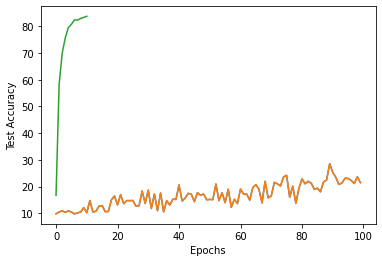

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acc_base_1)



budget=[]
for e in range(0,100,):
    #print(e)
    eps =analysis.epsilon( 60000, params['minibatch_size'], params['noise_multiplier'],  e + 1 , params['delta'])
    budget.append(eps)

plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.plot(acc_base_1)
plt.plot(acc_test)